<a href="https://colab.research.google.com/github/cyberanalyst268/Data-Science-and-Decision-Making/blob/main/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [2]:
#Load Jester dataset
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', na_values=["?"],header=None)  
data = data.replace(99, np.NaN)
data = data.drop(data.columns[0], axis=1)
data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.iloc[18634,98]

-4.37

In [27]:
tdata = data.mean(axis=0)
tdata.sort_values(ascending=False)

50    3.665085
89    3.574720
36    3.312500
27    3.189821
32    3.155988
        ...   
13   -1.762882
57   -1.990664
44   -2.111891
16   -3.104818
58   -3.833880
Length: 100, dtype: float64

In [28]:
arr = data.values
print(arr.shape)

(24983, 100)


In [6]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [7]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [8]:
new_arr, idx = replace(arr, 0.1)

In [9]:
arr[idx[0][0], idx[1][0]]

8.88

In [10]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [11]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [12]:
latent_item_features

array([[0.225, 0.481],
       [0.326, 0.213],
       [0.046, 0.599],
       [0.734, 0.222],
       [0.801, 0.435],
       [0.165, 0.343],
       [0.536, 0.905],
       [0.855, 0.238],
       [0.21 , 0.868],
       [0.003, 0.167],
       [0.706, 0.491],
       [0.152, 0.312],
       [0.911, 0.558],
       [0.226, 0.2  ],
       [0.74 , 0.55 ],
       [0.618, 0.073],
       [0.275, 0.952],
       [0.346, 0.948],
       [0.917, 0.362],
       [0.557, 0.977],
       [0.588, 0.653],
       [0.032, 0.67 ],
       [0.628, 0.97 ],
       [0.77 , 0.054],
       [0.921, 0.72 ],
       [0.806, 0.015],
       [0.143, 0.611],
       [0.548, 0.561],
       [0.564, 0.583],
       [0.01 , 0.727],
       [0.467, 0.471],
       [0.548, 0.786],
       [0.816, 0.282],
       [0.764, 0.637],
       [0.436, 0.845],
       [0.594, 0.22 ],
       [0.2  , 0.878],
       [0.586, 0.445],
       [0.554, 0.912],
       [0.99 , 0.337],
       [0.519, 0.193],
       [0.772, 0.906],
       [0.34 , 0.837],
       [0.2

In [20]:
np.amax(latent_item_features)

3.7844997548724244

In [21]:
np.amin(latent_item_features)

-3.009080561504788

In [13]:
latent_user_preferences

array([[0.853, 0.927],
       [0.197, 0.117],
       [0.53 , 0.892],
       ...,
       [0.334, 0.827],
       [0.617, 0.451],
       [0.799, 0.922]])

In [22]:
np.amax(latent_user_preferences)

1.4484231516235506

In [23]:
np.amin(latent_user_preferences)

-0.7858701743546233

In [14]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 1) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=26.151542
Iteration 1/10:	MSE=25.198843
Iteration 2/10:	MSE=24.906702
Iteration 3/10:	MSE=24.670364
Iteration 4/10:	MSE=24.437319
Iteration 5/10:	MSE=24.201713
Iteration 6/10:	MSE=23.963726
Iteration 7/10:	MSE=23.724773
Iteration 8/10:	MSE=23.486570
Iteration 9/10:	MSE=23.250836


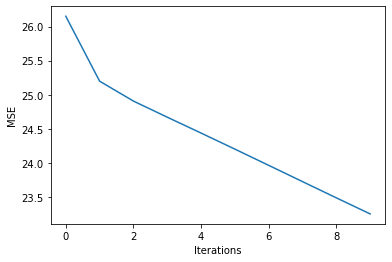

In [15]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [16]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.789, 1.197, 1.173, ..., 2.151, 0.872, 2.769],
       [0.455, 0.294, 0.291, ..., 0.544, 0.216, 0.711],
       [2.316, 1.611, 1.558, ..., 2.8  , 1.163, 3.543],
       ...,
       [1.054, 0.793, 0.747, ..., 1.289, 0.562, 1.573],
       [1.13 , 0.72 , 0.717, ..., 1.349, 0.531, 1.773],
       [2.181, 1.477, 1.442, ..., 2.627, 1.073, 3.364]])

In [17]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [18]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.7889306437666945)","(8.79, 1.196626367830556)","(-9.66, 1.1725734580609428)","(-8.16, -1.0079083688416695)","(-7.52, 1.1844603186821574)","(-8.5, 3.068394476492032)","(-9.85, -0.009458172341433792)","(4.17, -0.4896233420854995)","(-8.98, -0.036719900154923164)","(-4.76, 2.2513221117391997)",...,"(2.82, 3.361743486219544)","(nan, 2.475957255405083)","(nan, 4.05866373271903)","(nan, 2.2086008365741185)","(nan, 2.0682652758130162)","(nan, 2.76156955882015)","(-5.63, 2.8869522092607447)","(nan, 2.150800436930134)","(nan, 0.8721590271757578)","(nan, 2.768762409894986)"
1,"(4.08, 0.45469181020893834)","(-0.29, 0.29384559000053584)","(6.36, 0.29143743618118184)","(4.37, -0.2622204945786554)","(-2.38, 0.3034921521439605)","(-9.66, 0.7804833599364253)","(-0.73, -0.0007294799060358264)","(-5.34, -0.1269975070831058)","(8.88, -0.017657197021067408)","(9.22, 0.574596699188502)",...,"(2.82, 0.8587286843768898)","(-4.95, 0.6311272751821551)","(-0.29, 1.0401868989230907)","(7.86, 0.566014852487159)","(-0.19, 0.5396376066447441)","(-2.14, 0.7110146266105614)","(3.06, 0.7450421102444326)","(0.34, 0.5440683519171441)","(-4.32, 0.21606196555026777)","(1.07, 0.7105898664644088)"
2,"(nan, 2.3158248061558786)","(nan, 1.6114499077464692)","(nan, 1.557872552405427)","(nan, -1.2681839597446076)","(9.03, 1.5185528693770995)","(9.27, 3.9685519386017196)","(9.03, -0.02238486433026511)","(9.27, -0.6183883165410792)","(nan, 0.0028768170195617128)","(nan, 2.899996859814362)",...,"(nan, 4.325984781538581)","(nan, 3.194214654613047)","(nan, 5.201992955128353)","(9.08, 2.830905493742981)","(nan, 2.5929646718266266)","(nan, 3.5197788130091383)","(nan, 3.6690151365458217)","(nan, 2.8000206767097193)","(nan, 1.1630374537766932)","(nan, 3.542734399455711)"
3,"(nan, 1.4373591780673822)","(8.35, 1.0784107056699133)","(nan, 1.0170137332515776)","(nan, -0.7412401127599856)","(1.8, 0.9239979629802969)","(8.16, 2.458667926662568)","(-2.82, -0.026611837467132877)","(6.21, -0.3644451536437562)","(nan, 0.06500934521189383)","(1.84, 1.7818669529063595)",...,"(nan, 2.6525272633038255)","(nan, 1.9687688222651856)","(nan, 3.16340909981858)","(0.53, 1.7216927385777725)","(nan, 1.5034368607114375)","(nan, 2.1154410696515065)","(nan, 2.191668990078722)","(nan, 1.75763011026432)","(nan, 0.7645030383324227)","(nan, 2.1468007213528733)"
4,"(8.5, 1.9144105457190486)","(4.61, 1.2644599599246913)","(-4.17, 1.2445117754316815)","(-5.39, -1.088047881954608)","(1.36, 1.2713525706162019)","(1.6, 3.2845424090022926)","(7.04, -0.007504180975693722)","(4.61, -0.5279528113648918)","(-0.44, -0.0523069414353804)","(5.73, 2.4129539224507477)",...,"(5.19, 3.6042275212859227)","(5.58, 2.6524625965332946)","(4.27, 4.356787561884314)","(5.19, 2.3707946317660826)","(5.73, 2.235139588676977)","(1.55, 2.9695087176010957)","(3.11, 3.107060778158568)","(6.55, 2.2975990678161518)","(1.8, 0.9245585616921858)","(1.6, 2.9736844850631643)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,"(0.44, 1.7802016935525127)","(7.43, 1.2007126857890096)","(9.08, 1.1732067835690028)","(2.33, -0.9971696452686839)","(3.2, 1.1763313470632712)","(6.75, 3.05285328191135)","(-8.79, -0.011025510156154378)","(-0.53, -0.48477704720108383)","(-8.74, -0.028519910315373882)","(7.23, 2.238044611381247)",...,"(8.83, 3.341220260802524)","(-1.21, 2.462127935829975)","(9.22, 4.030575158844669)","(-6.7, 2.1933381381257706)","(8.45, 2.044734098987221)","(9.03, 2.739318973890398)","(6.55, 2.862009471342139)","(8.69, 2.14281080984387)","(8.79, 0.8733131872179933)","(7.43, 2.748647603619293)"
24979,"(9.13, -0.08662228671395476)","(-8.16, -0.07894118684773685)","(8.59, -0.07022258404182977)","(9.08, 0.03648911295111134)","(0.87, -0.052382172945089636)","(-8.93, -0.147371271998063)","(-3.5, 0.003871690974390231)","(5.78, 0.018509364695387685)","(-8.11, -0.015191904807531425)","(4.9, -0.10416186855321345)",...,"(-1.17, -0.1540633519

In [47]:
mdata = pd.read_excel('movies_latent_factors.xlsx')
mdata

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9806,The Incredibles (2004),0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
96,10020,Beauty and the Beast (1991),1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
97,36657,X-Men (2000),0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790
98,36658,X2: X-Men United (2003),1.161006,-0.715613,0.712633,-0.688808,-0.717785,-1.007047,-0.267268,-0.802322,-0.249239,-0.540419,-0.291422,-0.240216,0.290714,-1.217250,-0.288130


In [53]:
mdata.iloc[:2848].values

array([[11, 'Star Wars: Episode IV - A New Hope (1977)',
        -1.5218476932977845, ..., 0.4038611510962773, 1.129616009775629,
        -0.24880587477821164],
       [12, 'Finding Nemo (2003)', -0.3421850499080402, ...,
        -0.564414727898898, 0.5068760116906501, 1.2749928648278452],
       [13, 'Forrest Gump (1994)', -2.240887934508497, ...,
        -0.3302756915483635, -2.209004313706874, -0.4190918295482105],
       ...,
       [36657, 'X-Men (2000)', 0.8119006735024838, ..., 0.6421050511274,
        -1.3555420210958147, 0.06779027068224247],
       [36658, 'X2: X-Men United (2003)', 1.1610062775783638, ...,
        0.2907144691569671, -1.2172503182629375, -0.28813038315189826],
       [36955, 'True Lies (1994)', 1.734008297797056, ...,
        0.3337031150150487, -0.22338211769589128, -0.022599234790454517]],
      dtype=object)

In [55]:
mmdata = mdata.mean(axis=0)
mmdata.sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Movie ID    2.574960e+03
Factor1     9.658940e-16
Factor6     8.038015e-16
Factor12    5.588585e-16
Factor13    5.495604e-16
Factor8     3.508305e-16
Factor11    2.592371e-16
Factor9     2.531308e-16
Factor3     2.468858e-16
Factor15    1.386391e-16
Factor4    -2.176037e-16
Factor14   -2.781109e-16
Factor5    -4.102274e-16
Factor2    -5.706546e-16
Factor10   -6.350476e-16
Factor7    -6.655787e-16
dtype: float64

In [106]:
ax = mdata[['Factor7','Movie ID']]
ax 

,Factor7,Movie ID
0,-1.848910,11
1,0.572887,12
2,-0.420876,13
3,-0.412352,14
4,0.828888,22
...,...,...
95,0.639252,9806
96,-0.007971,10020
97,-0.037449,36657
98,-0.267268,36658


In [115]:
qq = mdata[['Factor5','Title']]
qq.sort_values('Factor5',ascending=False)


,Factor5,Title
15,2.750878,The Lord of the Rings: The Two Towers (2002)
16,2.688624,The Lord of the Rings: The Return of the King ...
14,2.677432,The Lord of the Rings: The Fellowship of the R...
47,1.729541,Titanic (1997)
79,1.544977,Star Wars: Episode II - Attack of the Clones (...
...,...,...
11,-1.625467,Back to the Future (1985)
70,-1.691165,Toy Story (1995)
52,-1.715186,Men in Black (a.k.a. MIB) (1997)
34,-1.730847,Terminator 2: Judgment Day (1991)
